## Deep learning in theory and applications

# Anaemia prediction


### Dominika Wiśniewska

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras import Model
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from keras.utils import to_categorical

In [29]:
df = pd.read_csv("E:\\datasets\\anemia.csv")

## Dataset used

---

**Anaemia Prediction**

*Anaemia Prediction using Hb, Sex, %RBC prints*

*This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features*

[Link to the dataset](https://www.kaggle.com/datasets/humairmunir/anaemia-prediction)

In [30]:
df.Sex = df.Sex.replace('M ', 'M')
df.Sex = df['Sex'].str.replace('M ','M')
df.Sex = df['Sex'].str.replace('F ','F')

**First ten records from dataset**

In [14]:
df.head(10)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
5,6,M,45.0994,27.9645,26.9361,16.2,No
6,7,F,43.1457,30.1628,26.6915,8.6,Yes
7,8,F,43.6103,29.1099,27.2798,10.3,No
8,9,F,45.0423,29.1660,25.7918,13.0,No
9,10,F,46.5143,27.4282,26.0575,9.7,Yes


**Some statistics**

In [27]:
df.groupby('Anaemic')['Anaemic'].value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

In [18]:
df.groupby('Sex')['Anaemic'].value_counts()

Sex  Anaemic
F    No         32
     Yes        17
M    No         46
     Yes         9
Name: count, dtype: int64

## Transforming the dataset

In [34]:
df['Anaemic'] = LabelEncoder().fit_transform(df['Anaemic'])  # Yes = 1, No = 0
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male = 1, Female = 0

In [35]:
df.describe()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.00000
mean,52.500000,0.528846,45.654175,28.875507,25.470325,12.150962,0.25000
std,30.166206,0.501584,2.816294,1.554275,1.984671,2.512957,0.43511
min,1.000000,0.000000,38.796800,25.140300,19.541300,2.800000,0.00000
25%,26.750000,0.000000,43.911375,27.871300,24.896425,10.650000,0.00000
50%,52.500000,1.000000,45.385350,28.948750,25.953200,12.600000,0.00000
75%,78.250000,1.000000,46.968325,29.887275,26.721600,14.000000,0.25000
max,104.000000,1.000000,54.647800,32.368100,29.841400,16.300000,1.00000


In [ ]:
features = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
df['data'] = df[features].values.tolist()

df['target'] = df['Anaemic']
df = df[['data', 'target']]

In [ ]:
df.head(10)

,data,target
0,"[1.0, 43.2555, 30.8421, 25.9025, 6.3]",1
1,"[0.0, 45.6033, 28.19, 26.2067, 13.5]",0
2,"[0.0, 45.0107, 28.9677, 26.0215, 11.7]",0
3,"[0.0, 44.5398, 28.9899, 26.4703, 13.5]",0
4,"[1.0, 43.287, 30.6972, 26.0158, 12.4]",0
5,"[1.0, 45.0994, 27.9645, 26.9361, 16.2]",0
6,"[0.0, 43.1457, 30.1628, 26.6915, 8.6]",1
7,"[0.0, 43.6103, 29.1099, 27.2798, 10.3]",0
8,"[0.0, 45.0423, 29.166, 25.7918, 13.0]",0
9,"[0.0, 46.5143, 27.4282, 26.0575, 9.7]",1


In [8]:
X = np.array(df['data'].tolist())
y = np.array(df['target'].tolist())

num_features = X.shape[1]
num_classes = len(np.unique(y))

scaler = StandardScaler()
X = scaler.fit_transform(X)

y_one_hot = to_categorical(y, num_classes=num_classes)

**Compared models**
1. Adaline
1. Nonlinear neuron
1. MLP classifier

## Adaline model

```python
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

input_layer = Input(shape=(num_features, ))
linear_neuron = Dense(1, activation='linear')(input_layer)

adaline = Model(inputs=[input_layer], outputs=[linear_neuron])
adaline.compile(optimizer='sgd', loss='mse')

adaline.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0], validation_split=0.3, verbose=1)
```

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
input_layer = Input(shape=(num_features, ))
linear_neuron = Dense(1,activation='linear')(input_layer)

adaline = Model(inputs=[input_layer], outputs=[linear_neuron])
adaline.compile(optimizer='sgd', loss='mse')

In [ ]:
adaline.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0], validation_split=0.3, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.6246

c:\P\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_2']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 0.6246 - val_loss: 0.3882
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6057 - val_loss: 0.3751
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5875 - val_loss: 0.3626
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5701 - val_loss: 0.3506
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5533 - val_loss: 0.3392
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5372 - val_loss: 0.3281
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5217 - val_loss: 0.3176
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5068 - val_loss: 0.3075
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4924 - val_loss: 0.2978
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4786 - val_loss: 0.2885
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4654 - val_loss: 0.2796
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4526 - val_loss: 0.2711


In [ ]:
y_pred = adaline.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
class_report = classification_report(y_true, y_pred_classes, target_names=["Class 0", "Class 1"])

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98        25
     Class 1       0.88      1.00      0.93         7

    accuracy                           0.97        32
   macro avg       0.94      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



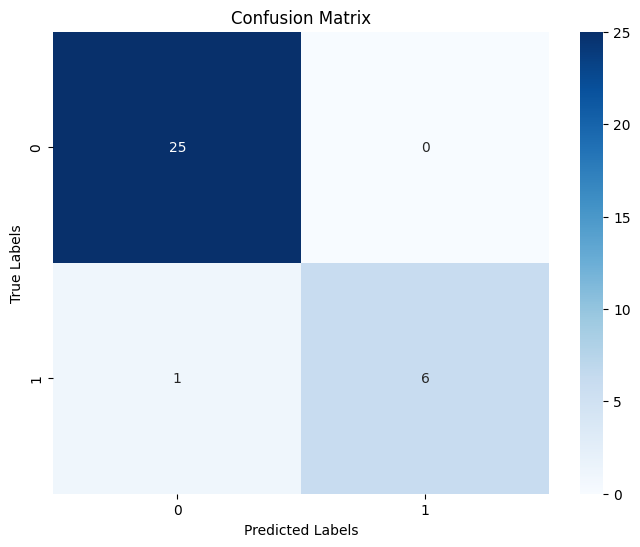

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Nonlinear neuron

```python
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

input_layer = Input(shape=(num_features, ))
neuron = Dense(1, activation='sigmoid')(input_layer)

nonlinear_neuron = Model(inputs=[input_layer], outputs=[neuron])
nonlinear_neuron.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

nonlinear_neuron.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_split=0.3, verbose=1)
```

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
input_layer = Input(shape=(num_features, ))
neuron = Dense(1, activation='sigmoid')(input_layer)

nonlinear_neuron = Model(inputs=[input_layer], outputs=[neuron])
nonlinear_neuron.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
nonlinear_neuron.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_split=0.3, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9600 - loss: 0.1970 - val_accuracy: 0.7727 - val_loss: 0.3195
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9600 - loss: 0.1969 - val_accuracy: 0.7727 - val_loss: 0.3194
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9600 - loss: 0.1969 - val_accuracy: 0.7727 - val_loss: 0.3194
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9600 - loss: 0.1969 - val_accuracy: 0.7727 - val_loss: 0.3194
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9600 - loss: 0.1968 - val_accuracy: 0.7727 - val_loss: 0.3194
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9600 - loss: 0.1968 - val_accuracy: 0.7727 - val_loss: 0.3193
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9600 - loss: 0.1968 - val_accuracy: 0.7727 - val_loss: 0.3193
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9600 - loss: 0.1968 - val_accuracy: 0.7727 - val_loss:

In [ ]:
y_pred = nonlinear_neuron.predict(X_test).flatten()
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
class_report = classification_report(y_true, y_pred_classes, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        25
     Class 1       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.93      0.95        32
weighted avg       0.97      0.97      0.97        32



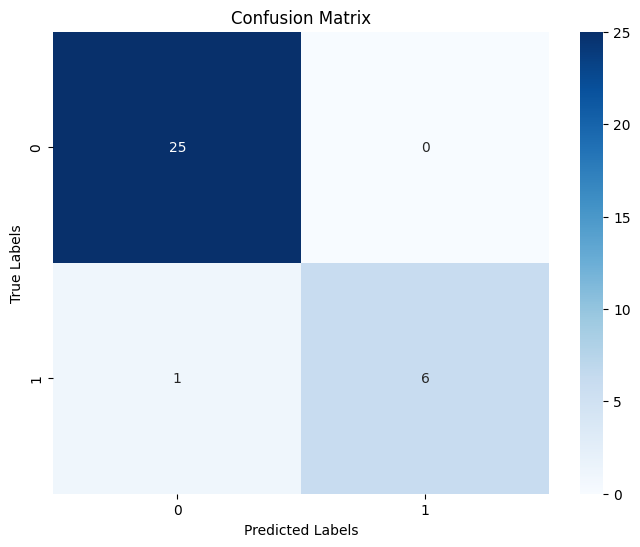

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## MLP

```python
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

input_layer = Input(shape=(num_features, ))
hidden_layer_1 = Dense(20, activation='relu')(input_layer)
hidden_layer_2 = Dense(10, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

mlp_class = Model(inputs=[input_layer], outputs=[output_layer])
mlp_class.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

training_history = mlp_class.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_split=0.3, verbose=1)
```

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
input_layer = Input(shape=(num_features, ))
hidden_layer_1 = Dense(20, activation='relu')(input_layer)
hidden_layer_2 = Dense(10, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

mlp_classifier = Model(inputs=[input_layer], outputs=[output_layer])
mlp_classifier.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
training_history = mlp_classifier.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_split=0.3, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9600 - loss: 0.3209 - val_accuracy: 0.8182 - val_loss: 0.3805
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9600 - loss: 0.3179 - val_accuracy: 0.8182 - val_loss: 0.3782
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9600 - loss: 0.3148 - val_accuracy: 0.8182 - val_loss: 0.3759
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9600 - loss: 0.3118 - val_accuracy: 0.8182 - val_loss: 0.3736
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9600 - loss: 0.3087 - val_accuracy: 0.8182 - val_loss: 0.3714
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9600 - loss: 0.3057 - val_accuracy: 0.8182 - val_loss: 0.3692
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9600 - loss: 0.3027 - val_accuracy: 0.8182 - val_loss: 0.3671
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9600 - loss: 0.2998 - val_accuracy: 0.8182 - val_loss:

In [ ]:
y_pred_prob = mlp_classifier.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_true = y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
class_report = classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"])

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98        25
     Class 1       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.93      0.95        32
weighted avg       0.97      0.97      0.97        32



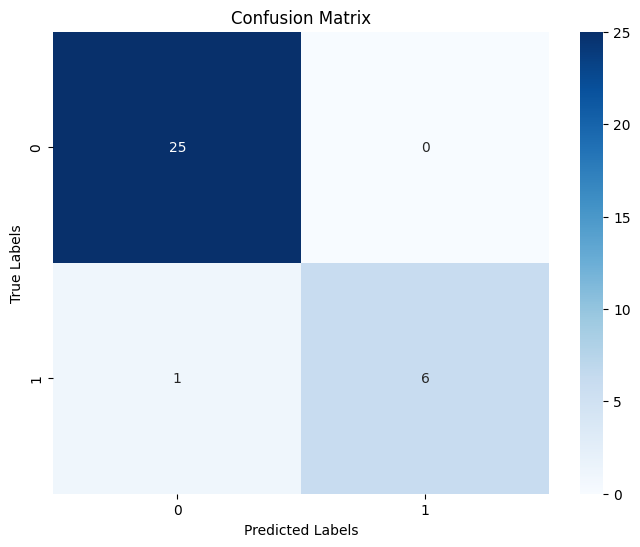

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## In conclusion

All models were able to achieve 97%.

For this dataset, mlp is overkill.

I would say adaline is enough, as it needs less learning than nn. 

# Thank you